In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ctgan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00


In [4]:
!pip install table_evaluator

In [5]:
import pandas as pd

path='/content/drive/MyDrive/Ml/ds_salaries.csv'
data = pd.read_csv(path)

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Data Procesing - scaling - train test split

In [4]:
data['remote_ratio'].unique()

array([100,   0,  50])

In [6]:
# Encoding 'company_size' as ordinal
ordinal_mapping_1 = {'S': 1, 'M': 2, 'L': 3}
data['company_size_encoded'] = data['company_size'].map(ordinal_mapping_1)

# one hot encoding de employment type
categorical_columns = ['employment_type']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Encoding 'experience_level' as ordinal
ordinal_mapping_2 = {'EN': 1, 'MI': 2, 'SE': 3 , 'EX':4}
data['experience_level_encoded'] = data['experience_level'].map(ordinal_mapping_2)


# Encoding 'remote_ratio' as ordinal
ordinal_mapping_3 = {0: 1, 50: 2, 100: 3}
data['remote_ratio_encoded'] = data['remote_ratio'].map(ordinal_mapping_3)

data.head()

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_encoded,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_encoded,remote_ratio_encoded
0,2023,SE,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3,False,True,False,3,3
1,2023,MI,ML Engineer,30000,USD,30000,US,100,US,S,1,False,False,False,2,3
2,2023,MI,ML Engineer,25500,USD,25500,US,100,US,S,1,False,False,False,2,3
3,2023,SE,Data Scientist,175000,USD,175000,CA,100,CA,M,2,False,True,False,3,3
4,2023,SE,Data Scientist,120000,USD,120000,CA,100,CA,M,2,False,True,False,3,3


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split

def filter_data (num_jobs , data ):

  data = data

  # Paso 1: Obtener los 10 trabajos más comunes
  top_n_jobs = data['job_title'].value_counts().nlargest(num_jobs).index.tolist()

  # Paso 2: Filtrar el DataFrame para incluir solo las filas con los 10 trabajos más comunes
  filtered_data = data[data['job_title'].isin(top_n_jobs)]

  # Paso 3: Verificar la forma (shape) del DataFrame resultante
  print("Forma del DataFrame antes de filtrar:", data.shape)
  print("Forma del DataFrame después de filtrar:", filtered_data.shape)

  features_for_modeling = ['job_title', 'salary_in_usd','remote_ratio_encoded' , 'company_size_encoded' ,'employment_type_FL' , 'employment_type_FT' , 'employment_type_PT' ,'experience_level_encoded']

  data_for_modeling = filtered_data[features_for_modeling]

  # Obtener los valores únicos en la columna 'job_title_encoded'
  unique_job_title = data_for_modeling['job_title'].unique()

  # Imprimir los valores únicos
  print(unique_job_title)
  data_for_modeling['job_title'].value_counts().plot.bar(color=['green', 'red','Blue','orange','yellow'])
  return data_for_modeling


def label_encoder(data ):
  data_for_modeling = data

  # Crear una instancia del LabelEncoder
  label_encoder = LabelEncoder()

  # Aplicar el encoding numérico a la columna 'job_title'
  data_for_modeling['job_title_encoded'] = label_encoder.fit_transform(data_for_modeling['job_title'])

  # Obtener los valores únicos en la columna 'job_title_encoded'
  unique_job_title = data_for_modeling['job_title'].unique()

  # Imprimir los valores únicos
  print(unique_job_title)


  data_for_modeling = pd.get_dummies(data_for_modeling, columns=['job_title'],drop_first=False)


  # data_for_modeling = data_for_modeling[['job_title_encoded', 'salary_in_usd','remote_ratio' , 'company_size_encoded' ,'employment_type_FL' , 'employment_type_FT' , 'employment_type_PT' ,'experience_level_encoded','job_title_Principal Data Engineer',	'job_title_Principal Data Scientist',	'job_title_Principal Machine Learning Engineer'	,'job_title_Product Data Analyst',	'job_title_Product Data Scientist',	'job_title_Research Engineer',	'job_title_Research Scientist',	'job_title_Software Data Engineer',	'job_title_Staff Data Analyst',	'job_title_Staff Data Scientist']]

  # Obtener los valores únicos en la columna 'job_title_encoded'
  unique_job_title_encoded = data_for_modeling['job_title_encoded'].unique()

  # Imprimir los valores únicos
  print(unique_job_title_encoded)

  data_for_modeling.head()

  return data_for_modeling


def preprocess_data ( num_of_labels , data):
  filtered_data = filter_data (num_jobs = num_of_labels , data=data )
  data_for_modeling = label_encoder(filtered_data)
  return data_for_modeling

def Scaling_and_split(data):

  data_for_modeling = data
  # Scaling
  scaled_features = ['salary_in_usd','remote_ratio_encoded' , 'company_size_encoded' ,'experience_level_encoded']
  scaler = MinMaxScaler()
  data_for_modeling[scaled_features] = scaler.fit_transform(data_for_modeling[scaled_features])

  # Train test split

  train_data, test_data = train_test_split(data_for_modeling, test_size=0.2, stratify=data_for_modeling['job_title_encoded'], random_state=42)

  # Imprimir las formas de los conjuntos resultantes
  print("Forma del conjunto de entrenamiento:", train_data.shape)
  print("Forma del conjunto de prueba:", test_data.shape)

  train_data['job_title_encoded'].value_counts().plot.bar(color=['green', 'red' , 'Blue'])
  return train_data,test_data

def cook_data(data , num_of_labels):
  data_for_modeling = preprocess_data(num_of_labels,data)
  train_data , test_data = Scaling_and_split(data_for_modeling)
  return train_data , test_data

train_data , test_data = cook_data(data=data ,num_of_labels=2)






In [162]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from matplotlib.pyplot import figure


def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos


def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    synt = df.iloc[4, 1:].values
    width = 0.1
    figure(figsize=(12, 11), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.bar(x+0.55, synt, width, color='red')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "SMOTE", "Oversampling", "Undersampling",'CTGANN'],loc='lower left')
    plt.show()

results = []

## Separate Labels and Features

In [46]:
labels_Collums_drop = ['job_title_encoded'] + ['job_title_Data Scientist' ,'job_title_Data Engineer']
one_hot_columns = ['job_title_Data Scientist' ,'job_title_Data Engineer']

X_train = train_data.drop( labels_Collums_drop , axis=1)
Y_train_multiclass = train_data['job_title_encoded']
Y_train_one_hot = train_data[one_hot_columns]
print("Forma del conjunto de train:",'Y_one_hot:',Y_train_one_hot.shape,'Y_Multiclass:' ,Y_train_multiclass.shape,'X:',X_train.shape)

X_test = test_data.drop(labels_Collums_drop, axis=1)
Y_test_multiclass = test_data['job_title_encoded']
Y_test_one_hot = test_data[one_hot_columns]
print("Forma del conjunto de test:",'Y_one_hot:',Y_test_one_hot.shape,'Y_Multiclass:' ,Y_test_multiclass.shape,'X:',X_test.shape)

Forma del conjunto de train: Y_one_hot: (1624, 2) Y_Multiclass: (1624,) X: (1624, 7)
Forma del conjunto de test: Y_one_hot: (376, 2) Y_Multiclass: (376,) X: (376, 7)


## Data Augmentation: CTGAN upsampling

In [40]:


# filtering to put it into ctgan

filtered_data_0 = train_data[train_data[ 'job_title_encoded']== 1]

# Paso 3: Verificar la forma (shape) del DataFrame resultante
print("Forma del DataFrame antes de filtrar:", train_data.shape)
print("Forma del DataFrame después de filtrar:", filtered_data_0.shape)


#filtered_data_2 = data_for_modeling[data_for_modeling[ 'job_title_encoded']== 2]

# Paso 3: Verificar la forma (shape) del DataFrame resultante
#print("Forma del DataFrame antes de filtrar:", data_for_modeling.shape)
#print("Forma del DataFrame después de filtrar:", filtered_data_2.shape)




Forma del DataFrame antes de filtrar: (1504, 10)
Forma del DataFrame después de filtrar: (671, 10)


In [41]:
from ctgan import CTGAN

categorical_features = ['remote_ratio_encoded','company_size_encoded',	'employment_type_FL'	,'employment_type_FT'	,'employment_type_PT',	'experience_level_encoded',	'job_title_encoded' ,'job_title_Data Engineer'	,'job_title_Data Scientist']

ctgan_label_0 = CTGAN(verbose=True)
ctgan_label_0.fit(filtered_data_0 , categorical_features, epochs = 200)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


Epoch 1, Loss G:  0.6500,Loss D:  0.0176
Epoch 2, Loss G:  0.6159,Loss D: -0.0411
Epoch 3, Loss G:  0.5438,Loss D: -0.0254
Epoch 4, Loss G:  0.5602,Loss D: -0.0474
Epoch 5, Loss G:  0.5112,Loss D: -0.0402
Epoch 6, Loss G:  0.5340,Loss D: -0.0687
Epoch 7, Loss G:  0.5441,Loss D: -0.0762
Epoch 8, Loss G:  0.4817,Loss D: -0.0843
Epoch 9, Loss G:  0.4916,Loss D: -0.1549
Epoch 10, Loss G:  0.4040,Loss D: -0.0945
Epoch 11, Loss G:  0.4684,Loss D: -0.1221
Epoch 12, Loss G:  0.4371,Loss D: -0.2023
Epoch 13, Loss G:  0.3975,Loss D: -0.2426
Epoch 14, Loss G:  0.3275,Loss D: -0.1616
Epoch 15, Loss G:  0.2753,Loss D: -0.2092
Epoch 16, Loss G:  0.2752,Loss D: -0.1962
Epoch 17, Loss G:  0.3018,Loss D: -0.2440
Epoch 18, Loss G:  0.1187,Loss D: -0.2313
Epoch 19, Loss G:  0.1284,Loss D: -0.3195
Epoch 20, Loss G:  0.1386,Loss D: -0.2889
Epoch 21, Loss G:  0.0652,Loss D: -0.2926
Epoch 22, Loss G: -0.0266,Loss D: -0.2097
Epoch 23, Loss G: -0.0584,Loss D: -0.3110
Epoch 24, Loss G: -0.0780,Loss D: -0.2279
E

In [42]:
samples_label_0 = ctgan_label_0.sample(1000)

In [13]:
samples_label_0

,salary_in_usd,remote_ratio_encoded,company_size_encoded,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_encoded,job_title_encoded,job_title_Data Engineer,job_title_Data Scientist
0,56745,1,2,False,True,False,3,1,False,True
1,187277,3,2,False,True,False,3,1,False,True
2,113479,3,2,False,True,False,3,1,False,True
3,44442,3,2,False,True,False,1,1,False,True
4,123435,3,2,False,True,False,3,1,False,True
...,...,...,...,...,...,...,...,...,...,...
995,-23640,2,2,False,True,False,3,1,False,True
996,36366,3,2,False,True,False,2,1,False,True
997,104019,3,2,False,True,False,3,1,False,True
998,135881,1,3,False,True,False,3,1,False,True


(840, 10) (1000, 10)


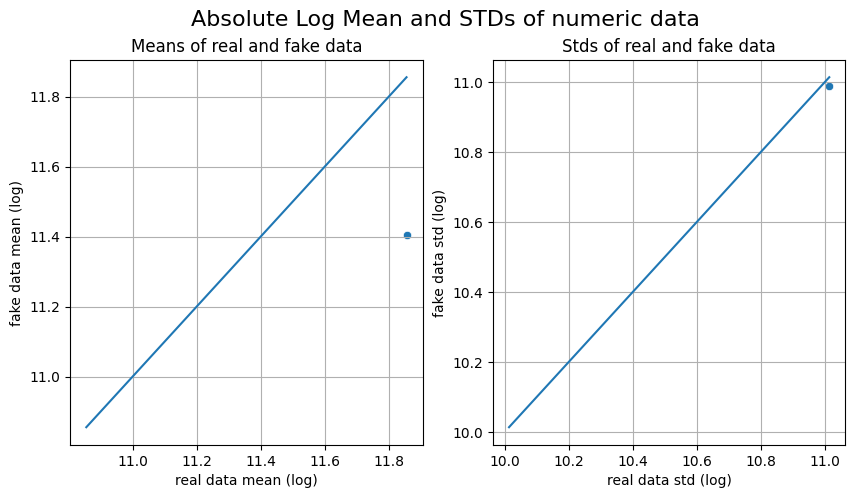

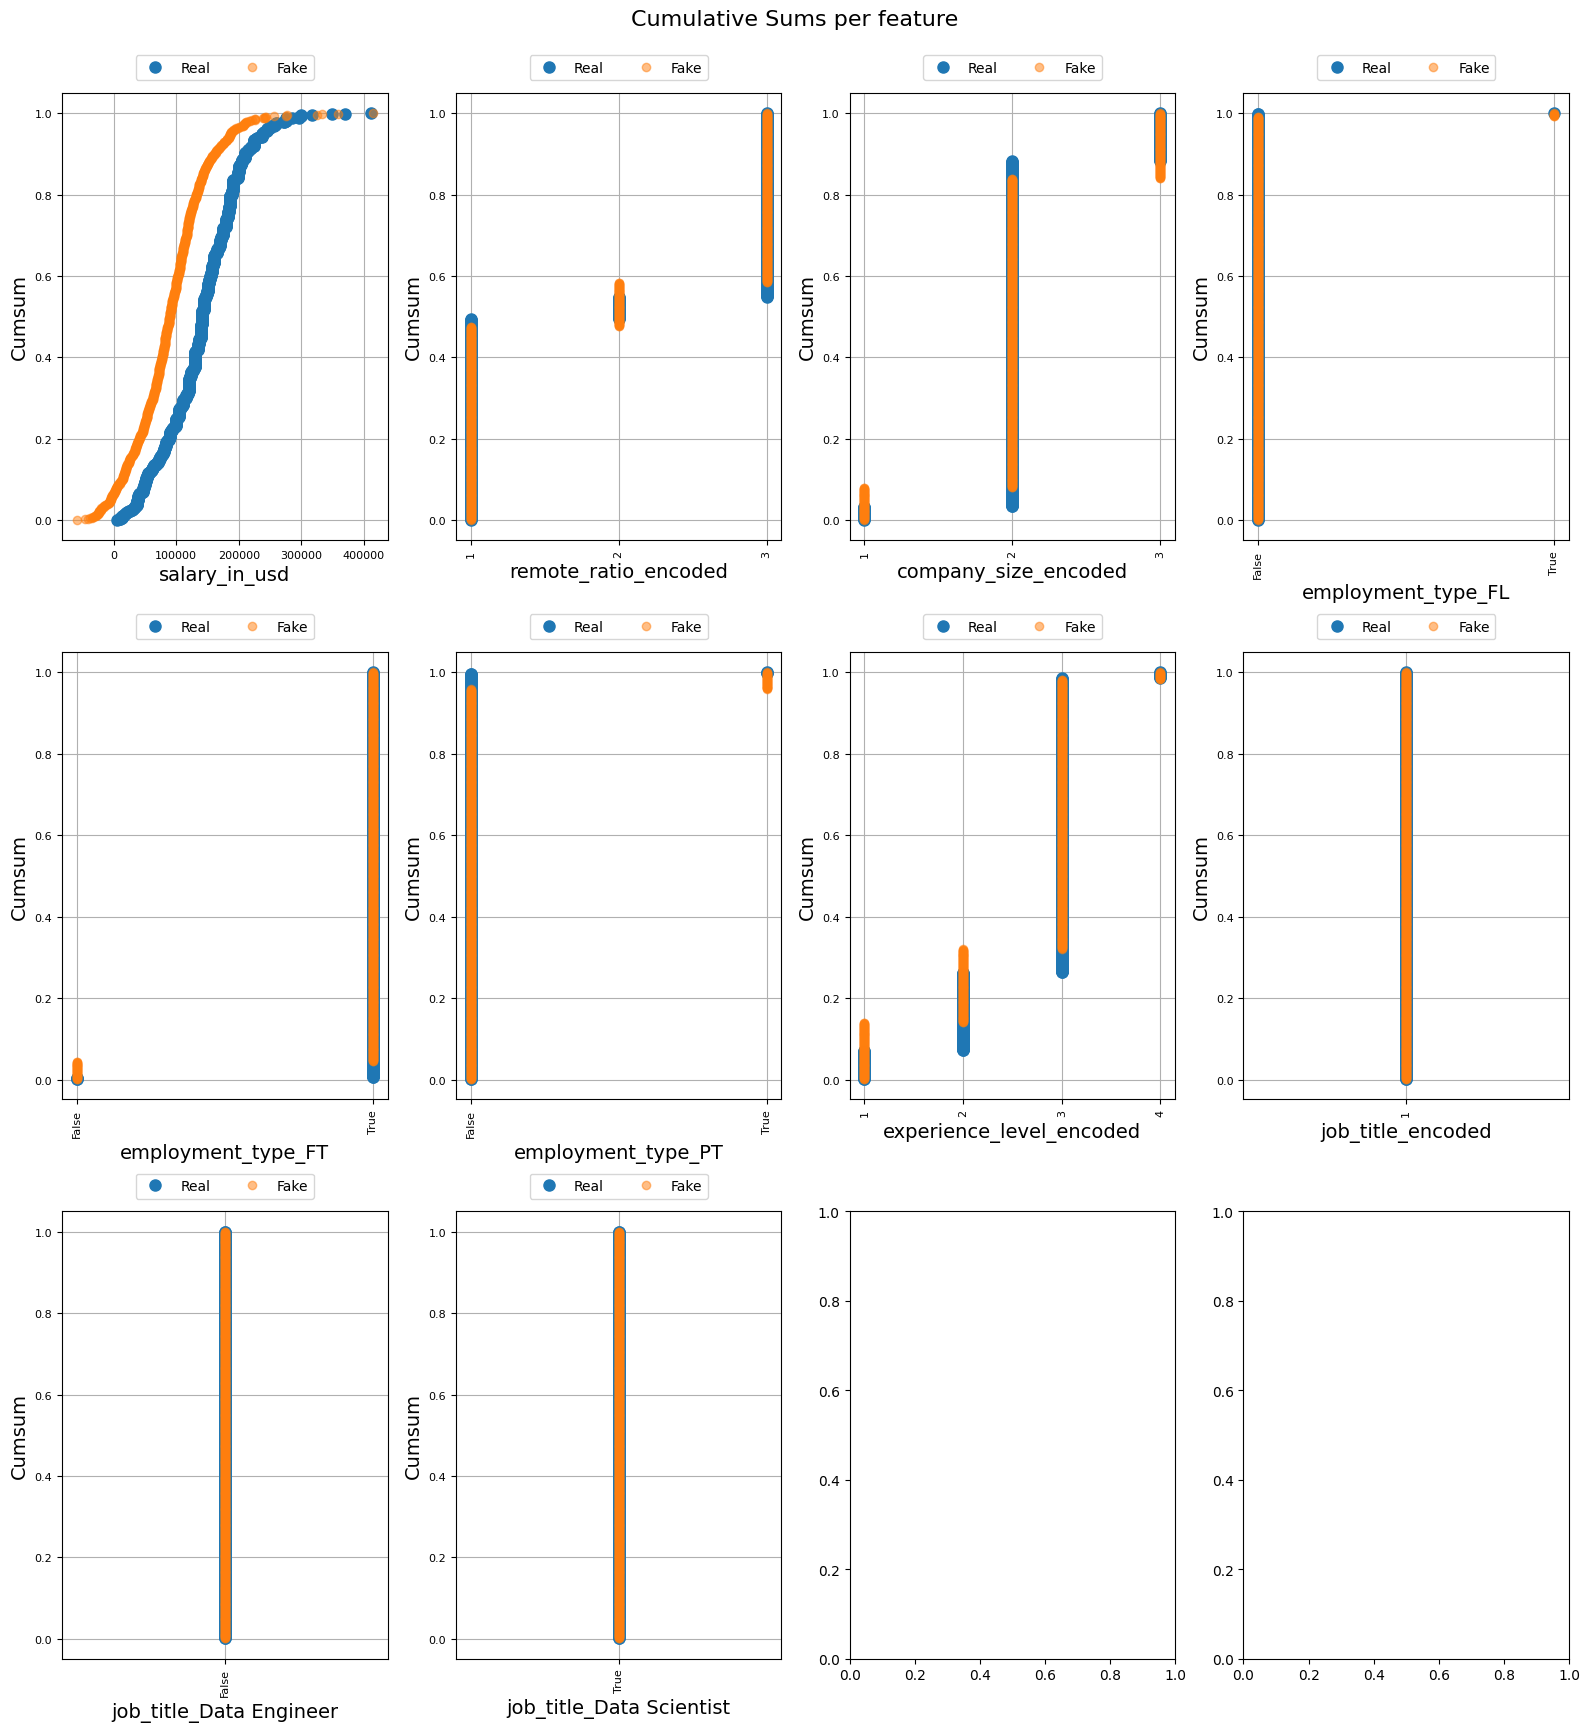

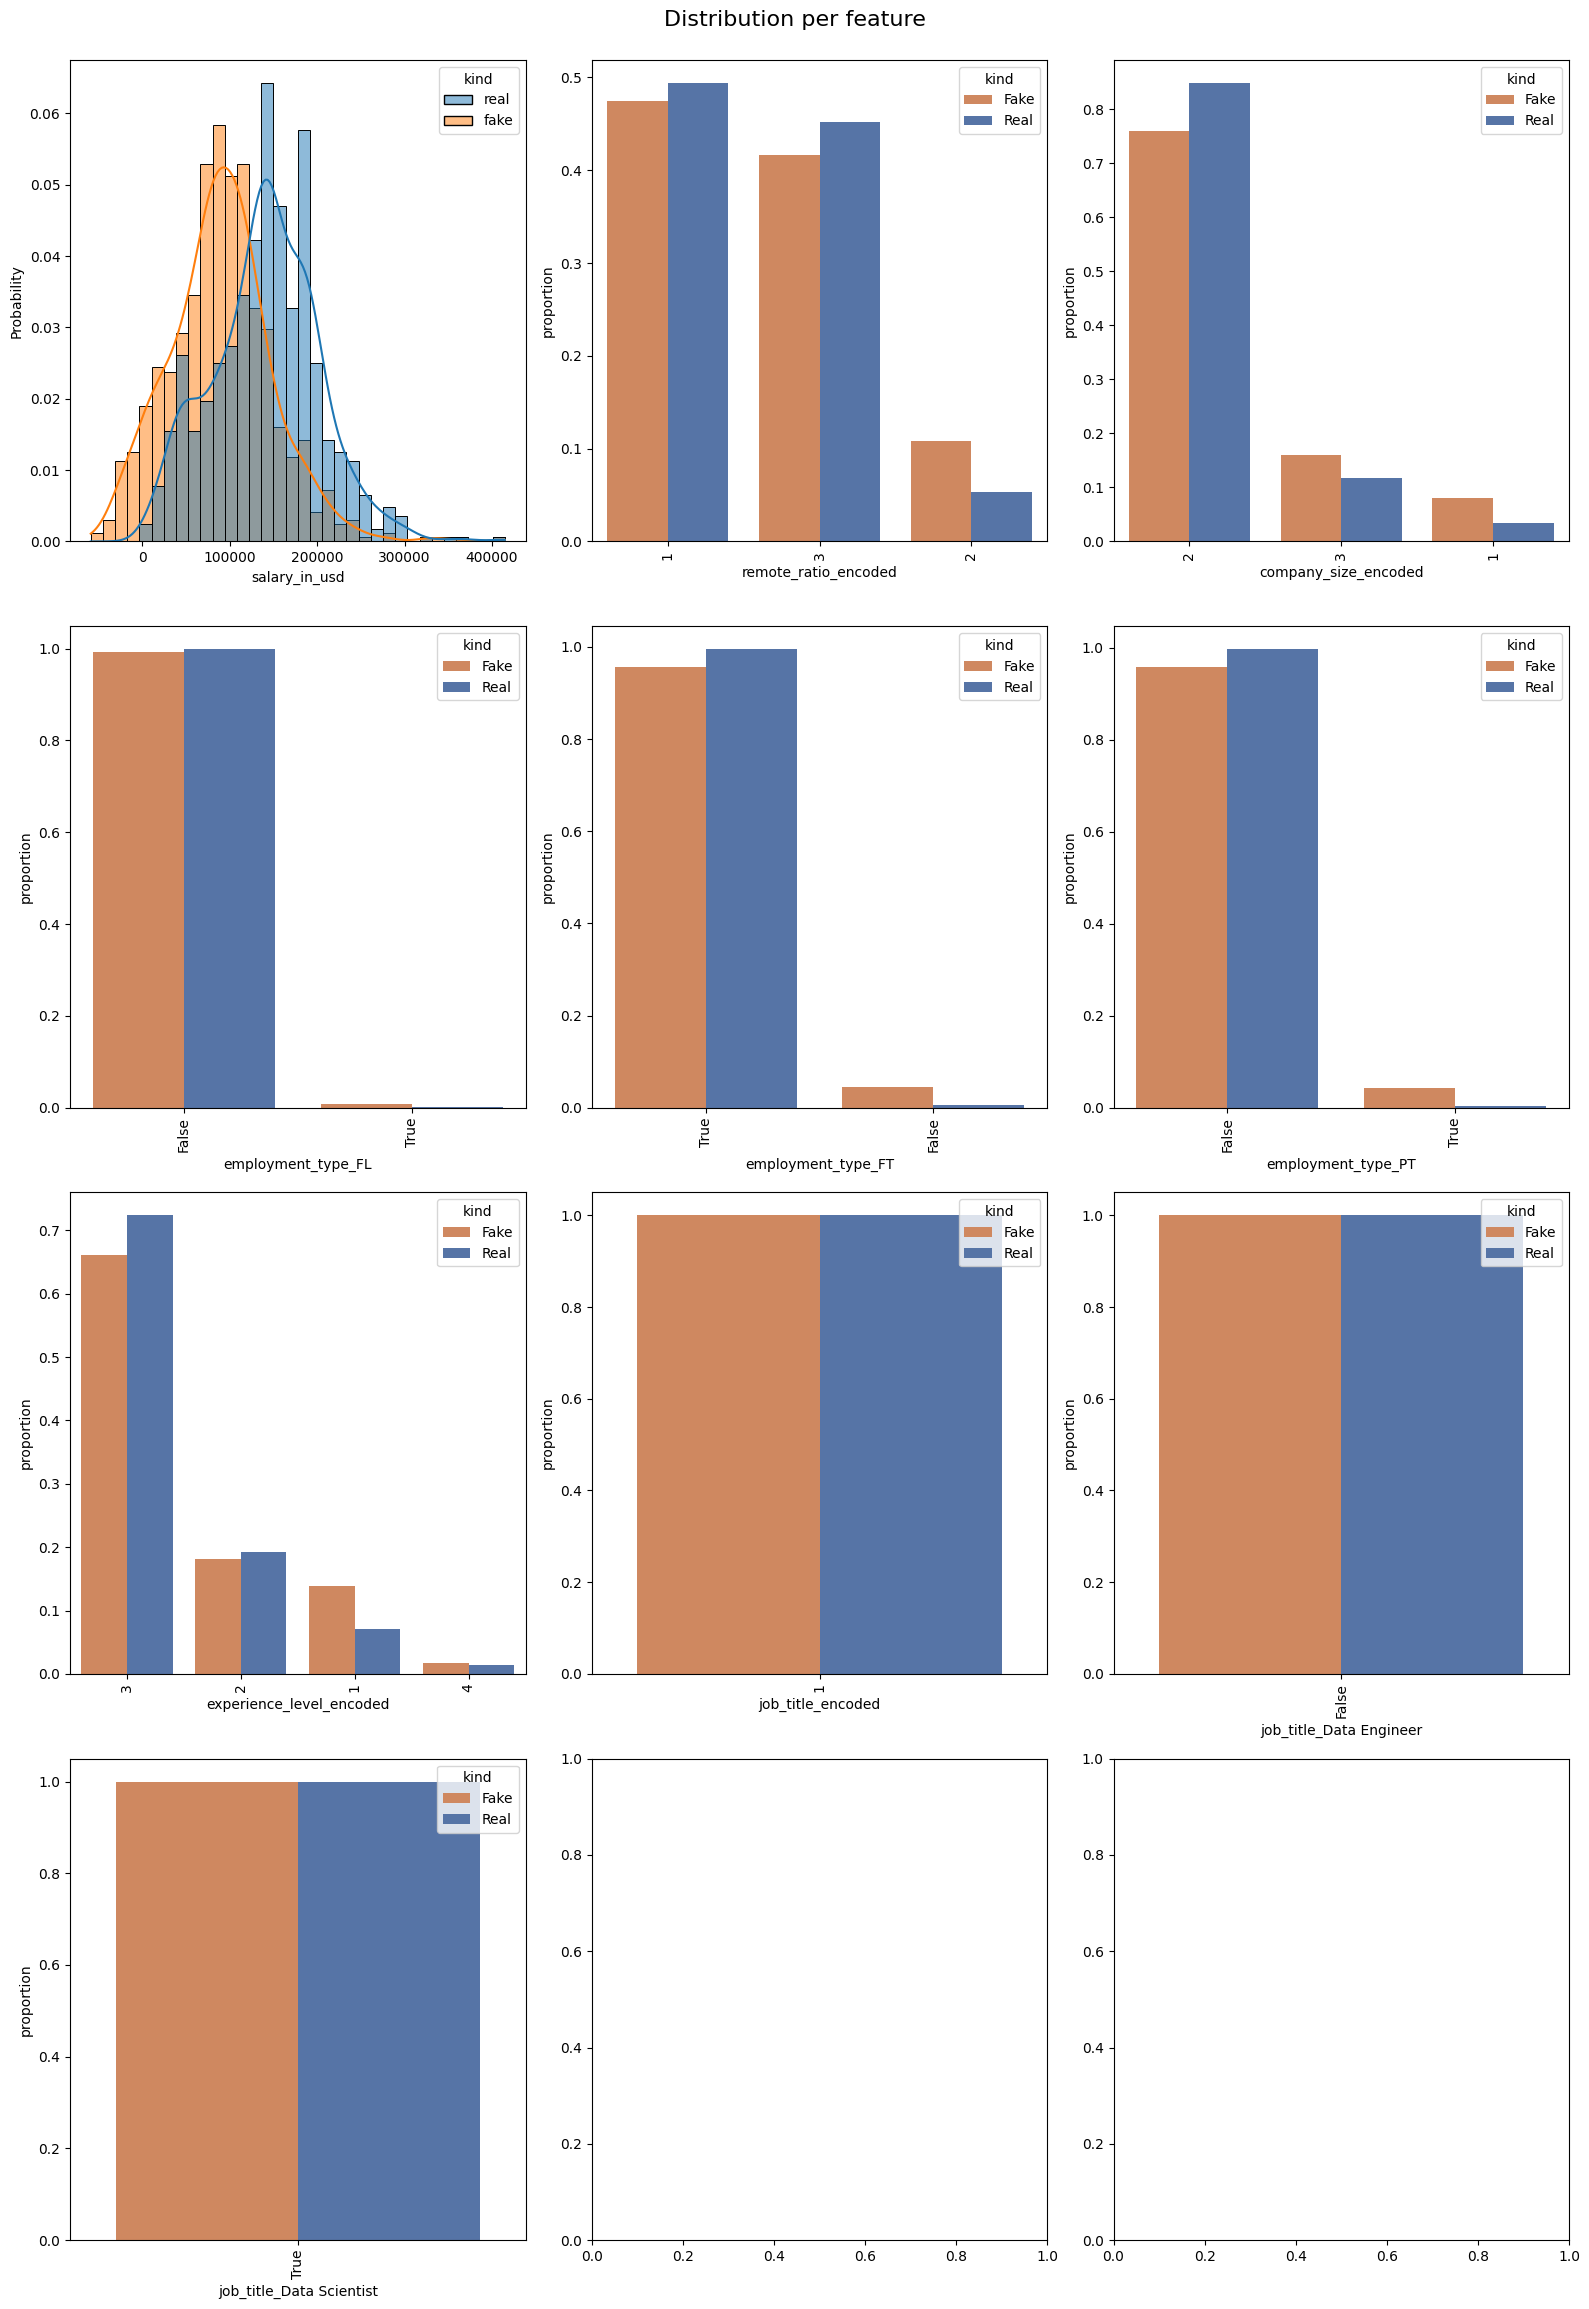

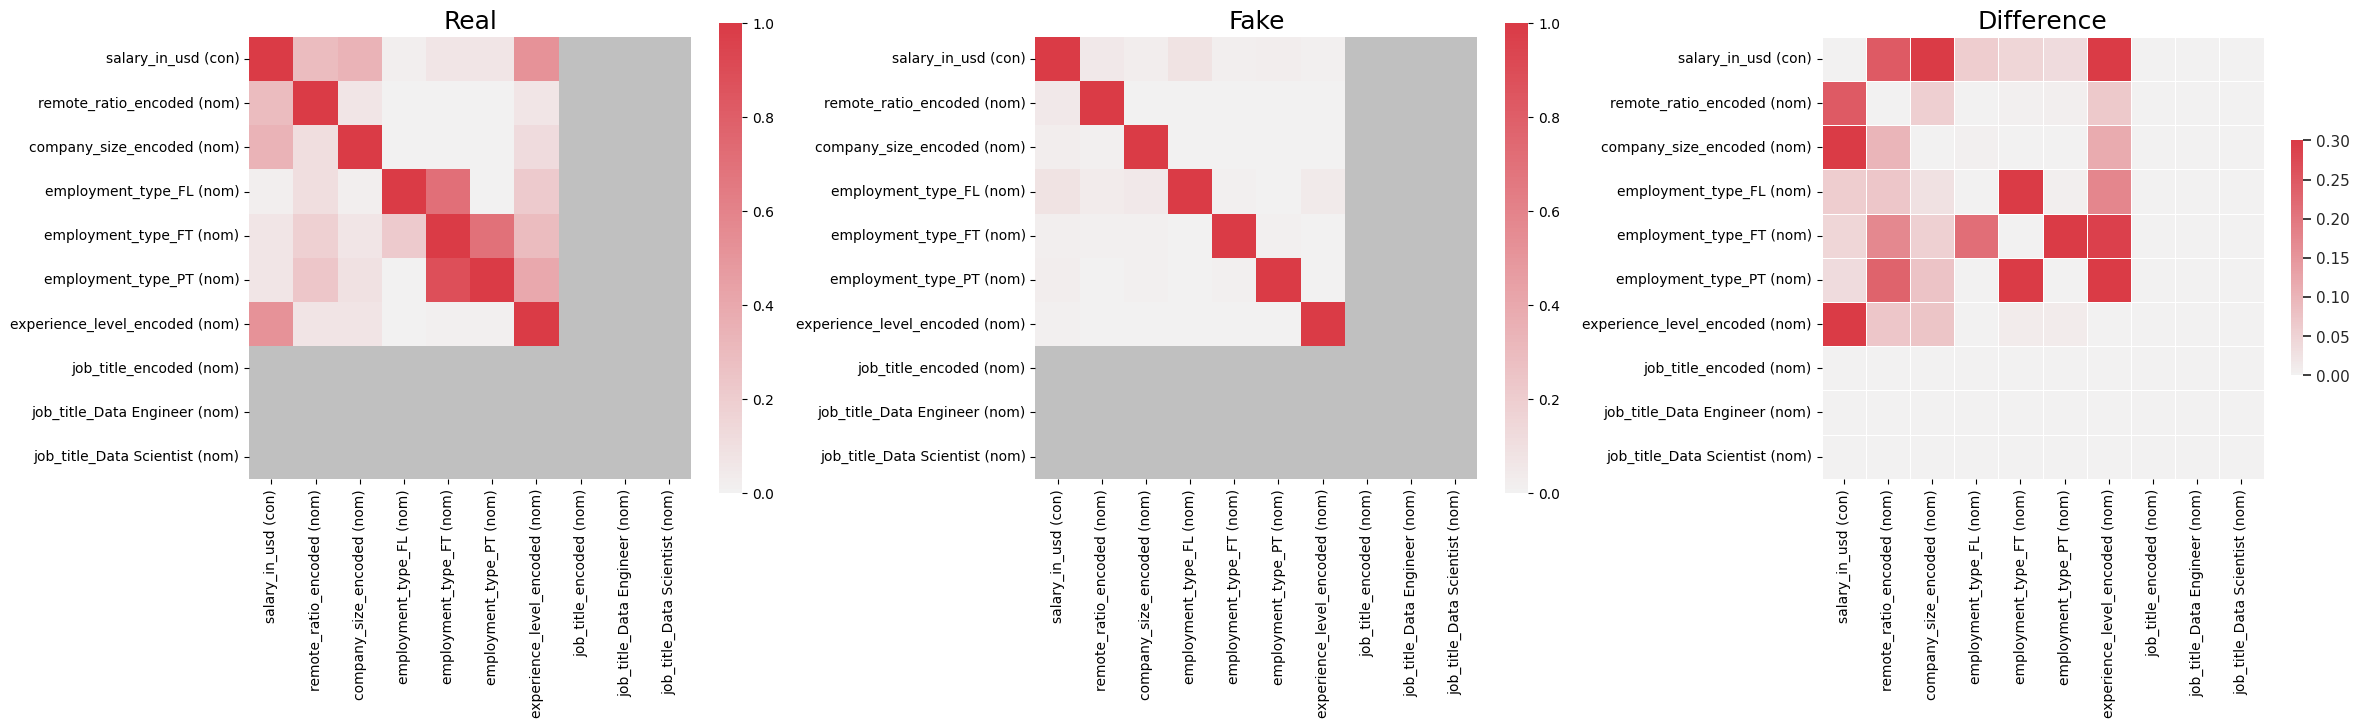

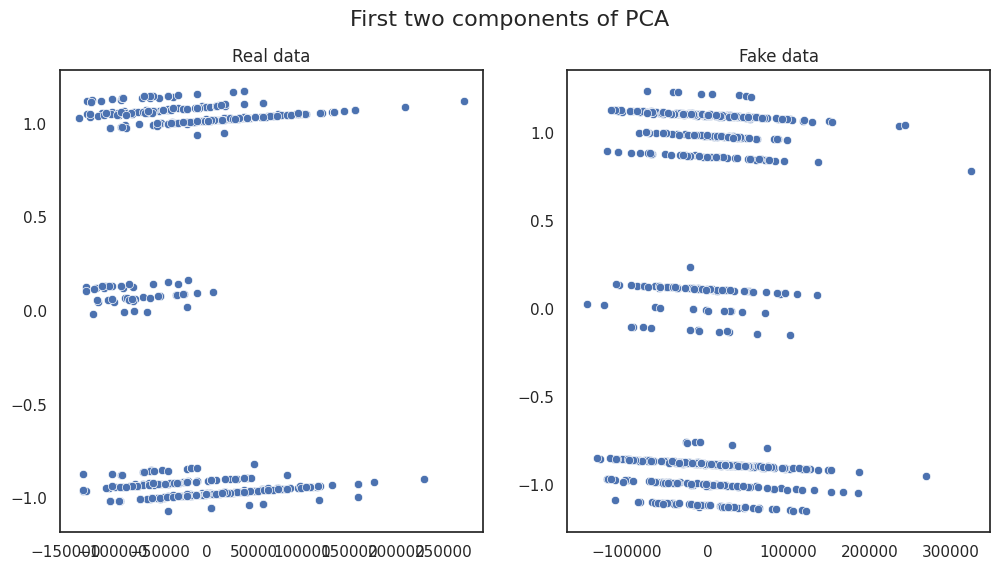

In [16]:
from table_evaluator import TableEvaluator

print(filtered_data_0.shape, samples_label_0.shape)
table_evaluator =  TableEvaluator(filtered_data_0, samples_label_0, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [43]:
print('original data shape:',train_data.shape)
print('GANNs Syntetic data label 0 shape:',samples_label_0.shape)
#rint('GANNs Syntetic data label 2 shape:',samples_label_2.shape)

original data shape: (1504, 10)
GANNs Syntetic data label 0 shape: (1000, 10)


In [44]:
selected_data_l0 = samples_label_0.sample(n=120, random_state=42)
#selected_data_l2 = samples_label_2.sample(n=200, random_state=42)

train_data = pd.concat([train_data, selected_data_l0])
print('augemented data shape:',train_data.shape)

augemented data shape: (1624, 10)


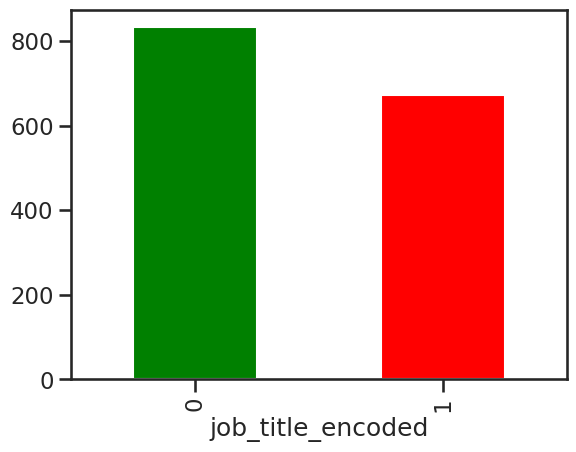

In [113]:
train_data['job_title_encoded'].value_counts().plot.bar(color=['green', 'red' , 'Blue'])

labels_Collums_drop = ['job_title_encoded'] + ['job_title_Data Scientist' ,'job_title_Data Engineer']
one_hot_columns = ['job_title_Data Scientist' ,'job_title_Data Engineer']

X_syntetic_over = train_data.drop( labels_Collums_drop , axis=1)
Y_syntetic_over = train_data['job_title_encoded']
Y_syntetic_over_one_hot = train_data[one_hot_columns]



## Data Augmentation: Other Sampling methods

In [62]:
!pip install imbalanced-learn

In [64]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote_sampler = SMOTE(random_state = 20)

X_smo , Y_smo = smote_sampler.fit_resample(X_train,Y_train_multiclass)

under_sampler = RandomUnderSampler(random_state=123)

X_under, Y_under = under_sampler.fit_resample(X_train, Y_train_multiclass)

over_sampler = RandomOverSampler(random_state=123)

X_over, Y_over = over_sampler.fit_resample(X_train, Y_train_multiclass)

## Logistic regresion

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Supongamos que tienes un DataFrame llamado 'data' con tus datos
# data = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo si es necesario

# Crear y entrenar el modelo de Regresión Logística Multinomial
model = LogisticRegression( solver='lbfgs', max_iter=100000, random_state=42)
model.fit(X_train, Y_train_multiclass)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

results_lr= []

# Evaluar el rendimiento del modelo
result = evaluate(Y_test_multiclass, y_pred, "Original")
print(result)
results_lr.append(result)

{'type': 'Original', 'accuracy': 0.5186170212765957, 'recall': 0.3431952662721893, 'auc': 0.50251550753223, 'precision': 0.453125, 'fscore': 0.34642775097633816}


In [149]:
model.fit(X_smo , Y_smo)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
result = evaluate(Y_test_multiclass, y_pred, "SMOTE")
print(result)
results_lr.append(result)

{'type': 'SMOTE', 'accuracy': 0.5053191489361702, 'recall': 0.4970414201183432, 'auc': 0.5045593574021667, 'precision': 0.4540540540540541, 'fscore': 0.4952380952380952}


In [150]:
model.fit(X_under, Y_under)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
result = evaluate(Y_test_multiclass, y_pred, "UnderSampling")
print(result)
results_lr.append(result)



{'type': 'UnderSampling', 'accuracy': 0.4973404255319149, 'recall': 0.47337278106508873, 'auc': 0.49514049681273764, 'precision': 0.4444444444444444, 'fscore': 0.4721906923950056}


In [151]:
model.fit(X_over, Y_over)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
result = evaluate(Y_test_multiclass, y_pred, "OverSampling")
print(result)
results_lr.append(result)

{'type': 'OverSampling', 'accuracy': 0.4946808510638298, 'recall': 0.48520710059171596, 'auc': 0.49381127976445705, 'precision': 0.44324324324324327, 'fscore': 0.4834467120181406}


In [152]:
model.fit(X_syntetic_over, Y_syntetic_over)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
result = evaluate(Y_test_multiclass, y_pred, "Syntetic Oversampling CTGANN")
print(result)
results_lr.append(result)

{'type': 'Syntetic Oversampling CTGANN', 'accuracy': 0.5611702127659575, 'recall': 0.05325443786982249, 'auc': 0.514549924248921, 'precision': 0.6428571428571429, 'fscore': 0.055201698513800426}


                           type  accuracy    recall       auc  precision  \
0                      Original  0.518617  0.343195  0.502516   0.453125   
1                         SMOTE  0.505319  0.497041  0.504559   0.454054   
2                 UnderSampling  0.497340  0.473373  0.495140   0.444444   
3                  OverSampling  0.494681  0.485207  0.493811   0.443243   
4  Syntetic Oversampling CTGANN  0.561170  0.053254  0.514550   0.642857   

     fscore  
0  0.346428  
1  0.495238  
2  0.472191  
3  0.483447  
4  0.055202  


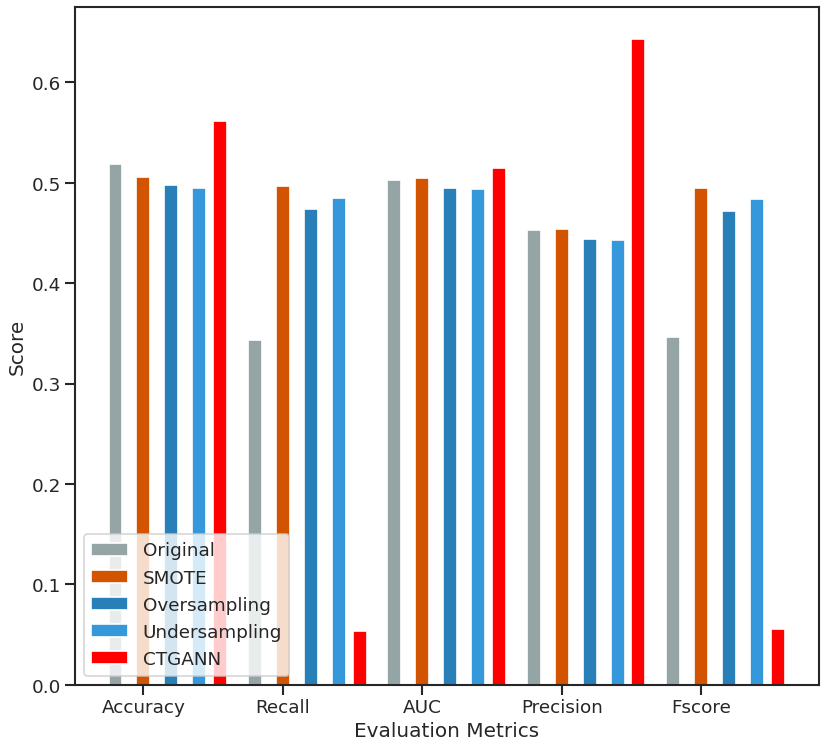

In [163]:
visualize_eval_metrics(results_lr)

## KNN binary

Mejores hiperparámetros: {'n_neighbors': 15, 'weights': 'distance'}
Mejor puntaje F1 ponderado: 0.6567267070414857
{'type': 'Original', 'accuracy': 0.6569148936170213, 'recall': 0.6331360946745562, 'auc': 0.6547322985450075, 'precision': 0.6149425287356322, 'fscore': 0.6324164582859743}


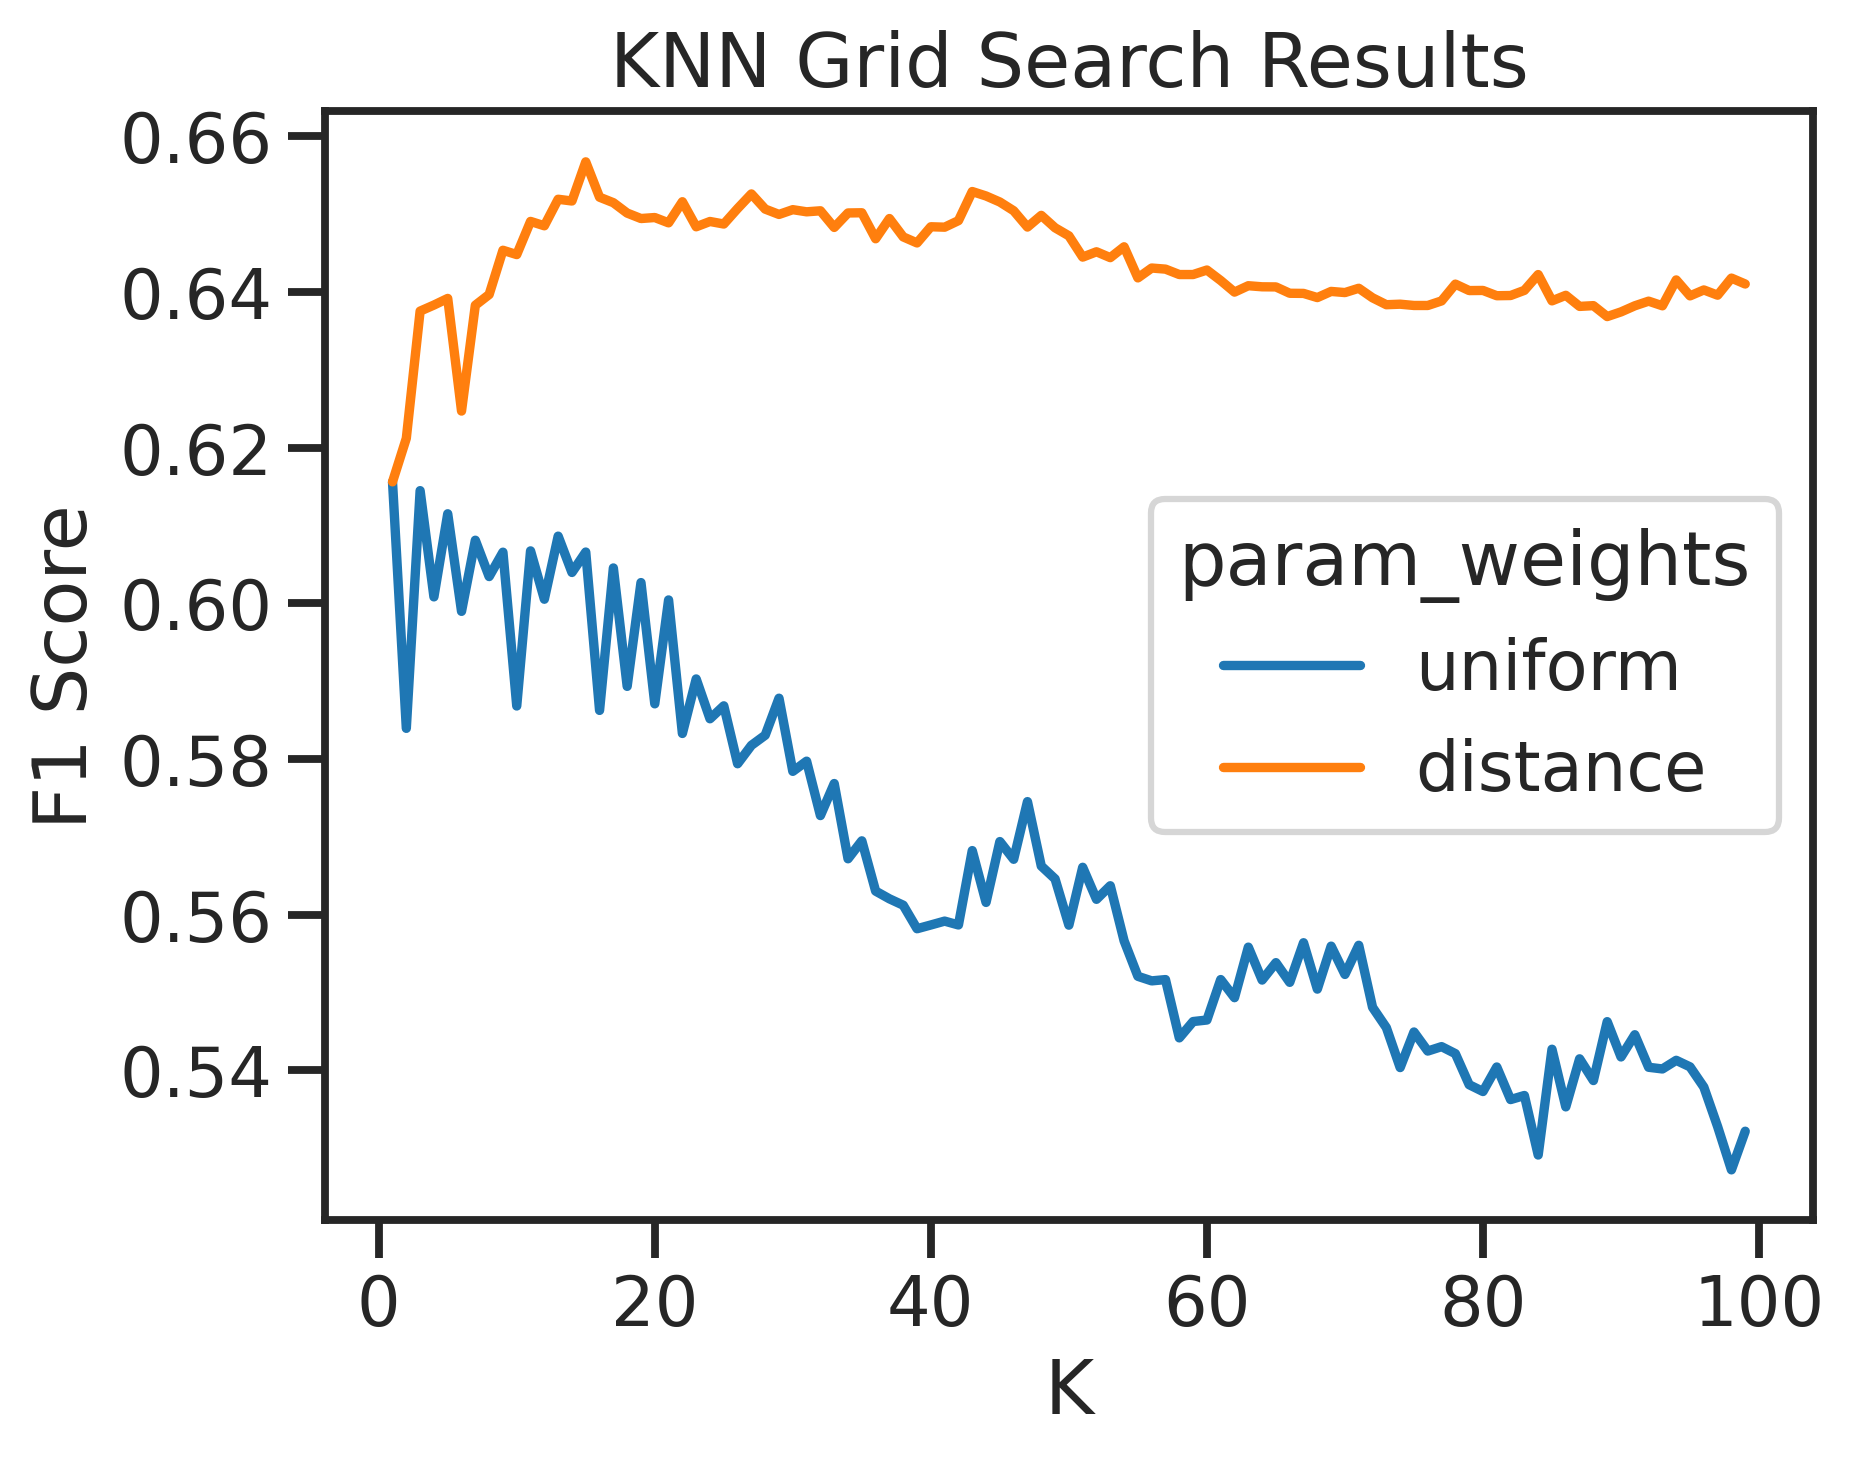

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un diccionario de hiperparámetros que deseas ajustar
param_grid = {
    'n_neighbors': list(range(1, 100)),  # Rango de valores para n_neighbors
    'weights': ['uniform', 'distance']  # Opciones para weights
}

# Crear un clasificador KNN
knn = KNeighborsClassifier()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1_weighted', cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, Y_train_multiclass)

# Obtener los resultados del grid search
results_df = pd.DataFrame(grid_search.cv_results_)

# Obtener el mejor modelo y sus hiperparámetros
best_knn = grid_search.best_estimator_





# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_knn.predict(X_test)



# y_pred contiene las predicciones del mejor modelo para X_test
results_knn = []


result = evaluate(Y_test_multiclass, y_pred, "Original")
print(result)
results_knn.append(result)

In [97]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_smo , Y_smo)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

result = evaluate(Y_test_multiclass, y_pred, "smote")
print(result)
results_knn.append(result)

{'type': 'smote', 'accuracy': 0.648936170212766, 'recall': 0.6449704142011834, 'auc': 0.6485721636223308, 'precision': 0.6022099447513812, 'fscore': 0.643213799364503}


In [98]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_under, Y_under)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

result = evaluate(Y_test_multiclass, y_pred, "undersampling")
print(result)
results_knn.append(result)

{'type': 'undersampling', 'accuracy': 0.6569148936170213, 'recall': 0.6627218934911243, 'auc': 0.6574479032673013, 'precision': 0.6086956521739131, 'fscore': 0.6604672261283738}


In [99]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_over , Y_over)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

result = evaluate(Y_test_multiclass, y_pred, "oversampling")
print(result)
results_knn.append(result)

{'type': 'oversampling', 'accuracy': 0.651595744680851, 'recall': 0.6627218934911243, 'auc': 0.6526169853929051, 'precision': 0.6021505376344086, 'fscore': 0.6601677624121515}


In [145]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_syntetic_over , Y_syntetic_over)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

result = evaluate(Y_test_multiclass, y_pred, "Syntetic Oversampling CTGANN")
print(result)
results_knn.append(result)

{'type': 'Syntetic Oversampling CTGANN', 'accuracy': 0.598404255319149, 'recall': 0.17751479289940827, 'auc': 0.5597718892033273, 'precision': 0.7142857142857143, 'fscore': 0.1827982188891493}


                           type  accuracy    recall       auc  precision  \
0                      Original  0.656915  0.633136  0.654732   0.614943   
1                         smote  0.648936  0.644970  0.648572   0.602210   
2                 undersampling  0.656915  0.662722  0.657448   0.608696   
3                  oversampling  0.651596  0.662722  0.652617   0.602151   
4  Syntetic Oversampling CTGANN  0.598404  0.177515  0.559772   0.714286   

     fscore  
0  0.632416  
1  0.643214  
2  0.660467  
3  0.660168  
4  0.182798  


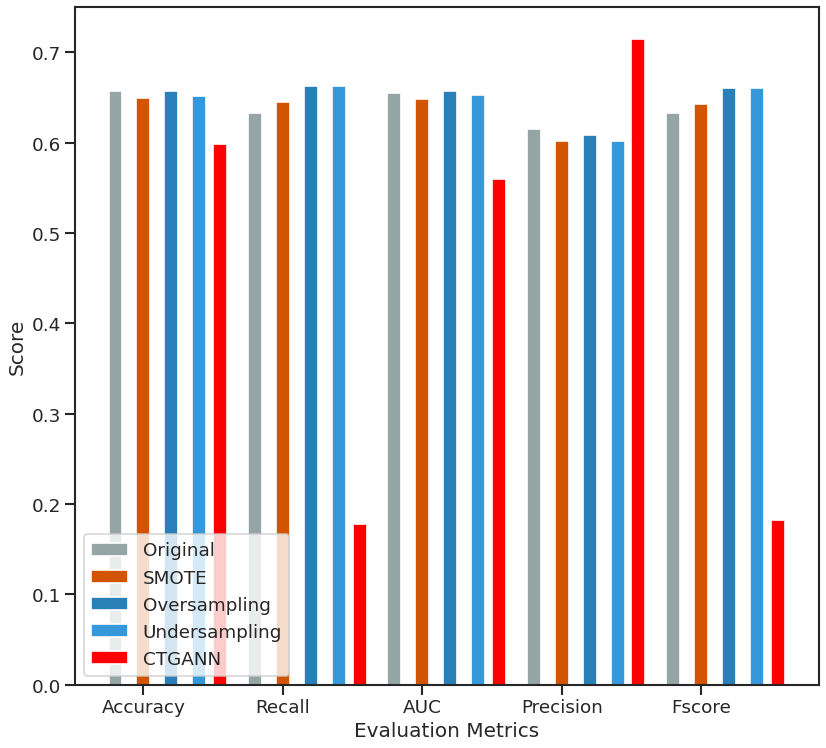

In [146]:
visualize_eval_metrics(results_knn)

## SVM + Nystroem grid search

In [108]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


# Crear una Pipeline que incluye el preprocesamiento Nystroem y el clasificador SVM
pipeline = Pipeline([
    ('nystroem', Nystroem(random_state=42)),

    ('svm', SVC(random_state=42))
])

# Definir los hiperparámetros que se probarán en la búsqueda de cuadrícula
param_grid = {
    'nystroem__n_components': [50,100,150,200,250,300],  # Número de componentes de Nystroem
    'svm__C': [0.1,0.5, 1,5, 10],
    'svm__kernel': ['rbf','linear'],
    'svm__gamma': [0.1,0.5, 1,5, 10]  # Parámetro de ancho del kernel RBF
}

# Realizar una búsqueda de cuadrícula con validación cruzada en la Pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train_multiclass)



# Obtener el modelo con los mejores hiperparámetros
best_pipeline = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)

# y_pred contiene las predicciones del mejor modelo para X_test
results_SVM = []


result = evaluate(Y_test_multiclass, y_pred, "Original")
print(result)
results_SVM.append(result)


{'type': 'Original', 'accuracy': 0.601063829787234, 'recall': 0.40828402366863903, 'auc': 0.5833690649744162, 'precision': 0.5798319327731093, 'fscore': 0.4129834254143646}


In [109]:
grid_search.fit(X_smo, Y_smo)

# Obtener el modelo con los mejores hiperparámetros
best_pipeline = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, "SMOTE")
print(result)
results_SVM.append(result)

{'type': 'SMOTE', 'accuracy': 0.5877659574468085, 'recall': 0.6568047337278107, 'auc': 0.5941028499556927, 'precision': 0.5336538461538461, 'fscore': 0.6510263929618768}


In [110]:
grid_search.fit(X_over, Y_over)

# Obtener el modelo con los mejores hiperparámetros
best_pipeline = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, "Oversampling")
print(result)
results_SVM.append(result)

{'type': 'Oversampling', 'accuracy': 0.5851063829787234, 'recall': 0.650887573964497, 'auc': 0.5911442700740359, 'precision': 0.5314009661835749, 'fscore': 0.6453068592057762}


In [111]:
grid_search.fit(X_under, Y_under)

# Obtener el modelo con los mejores hiperparámetros
best_pipeline = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, "Undersampling")
print(result)
results_SVM.append(result)

{'type': 'Undersampling', 'accuracy': 0.5797872340425532, 'recall': 0.6390532544378699, 'auc': 0.5852271103107224, 'precision': 0.526829268292683, 'fscore': 0.6338600451467269}


In [114]:
grid_search.fit(X_syntetic_over, Y_syntetic_over)

# Obtener el modelo con los mejores hiperparámetros
best_pipeline = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, "Syntetic Oversampling CTGANN")
print(result)
results_SVM.append(result)

{'type': 'Syntetic Oversampling CTGANN', 'accuracy': 0.598404255319149, 'recall': 0.17751479289940827, 'auc': 0.5597718892033273, 'precision': 0.7142857142857143, 'fscore': 0.1827982188891493}


                           type  accuracy    recall       auc  precision  \
0                      Original  0.601064  0.408284  0.583369   0.579832   
1                         SMOTE  0.587766  0.656805  0.594103   0.533654   
2                  Oversampling  0.585106  0.650888  0.591144   0.531401   
3                 Undersampling  0.579787  0.639053  0.585227   0.526829   
4  Syntetic Oversampling CTGANN  0.598404  0.177515  0.559772   0.714286   

     fscore  
0  0.412983  
1  0.651026  
2  0.645307  
3  0.633860  
4  0.182798  


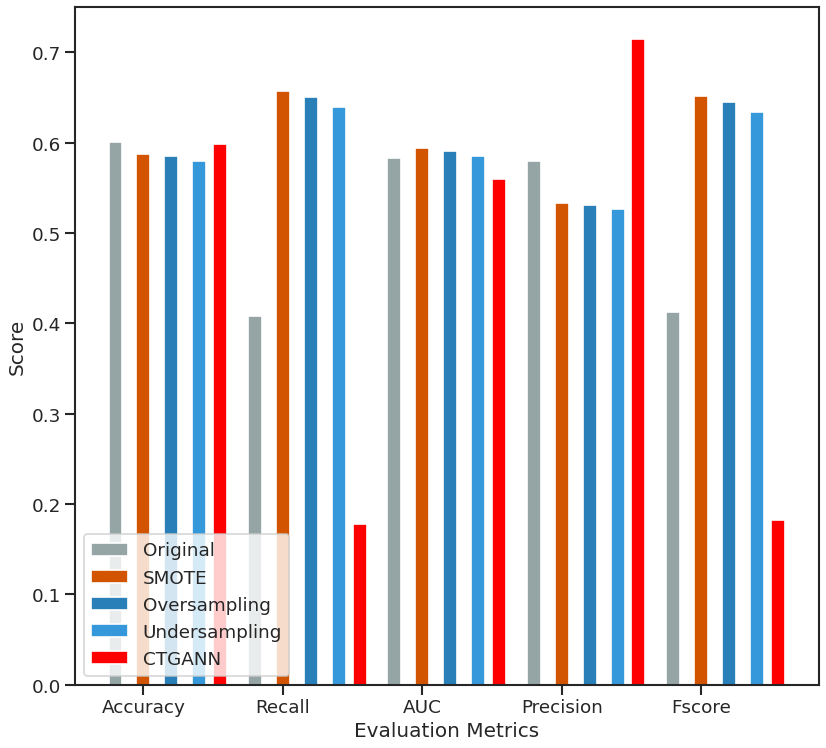

In [144]:
visualize_eval_metrics(results_SVM)

## Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
model.get_params().keys()

param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, Y_train_multiclass)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)

results_rf = []

result = evaluate(Y_test_multiclass, y_pred, "original")
print(result)
results_rf.append(result)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'type': 'original', 'accuracy': 0.6595744680851063, 'recall': 0.6449704142011834, 'auc': 0.6582339993711231, 'precision': 0.615819209039548, 'fscore': 0.64379827351204}


In [155]:
search.fit(X_smo, Y_smo)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, "original")
print(result)
results_rf.append(result)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'type': 'original', 'accuracy': 0.6462765957446809, 'recall': 0.6804733727810651, 'auc': 0.6494154303518853, 'precision': 0.5927835051546392, 'fscore': 0.6766236705136909}


In [156]:
search.fit(X_under, Y_under)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, "undersampling")
print(result)
results_rf.append(result)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'type': 'undersampling', 'accuracy': 0.6622340425531915, 'recall': 0.7041420118343196, 'auc': 0.6660806677529085, 'precision': 0.6071428571428571, 'fscore': 0.6998416647817236}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [157]:
search.fit(X_over, Y_over)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, "oversampling")
print(result)
results_rf.append(result)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'type': 'oversampling', 'accuracy': 0.6542553191489362, 'recall': 0.6863905325443787, 'auc': 0.6572049281079381, 'precision': 0.6010362694300518, 'fscore': 0.6826618379357174}


In [158]:
search.fit(X_syntetic_over, Y_syntetic_over)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)


result = evaluate(Y_test_multiclass, y_pred, 'syntetic_oversampling')
print(result)
results_rf.append(result)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'type': 'syntetic_oversampling', 'accuracy': 0.7978723404255319, 'recall': 0.7692307692307693, 'auc': 0.7952434039390561, 'precision': 0.7784431137724551, 'fscore': 0.7695810564663023}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


                    type  accuracy    recall       auc  precision    fscore
0               original  0.659574  0.644970  0.658234   0.615819  0.643798
1               original  0.646277  0.680473  0.649415   0.592784  0.676624
2          undersampling  0.662234  0.704142  0.666081   0.607143  0.699842
3           oversampling  0.654255  0.686391  0.657205   0.601036  0.682662
4  syntetic_oversampling  0.797872  0.769231  0.795243   0.778443  0.769581


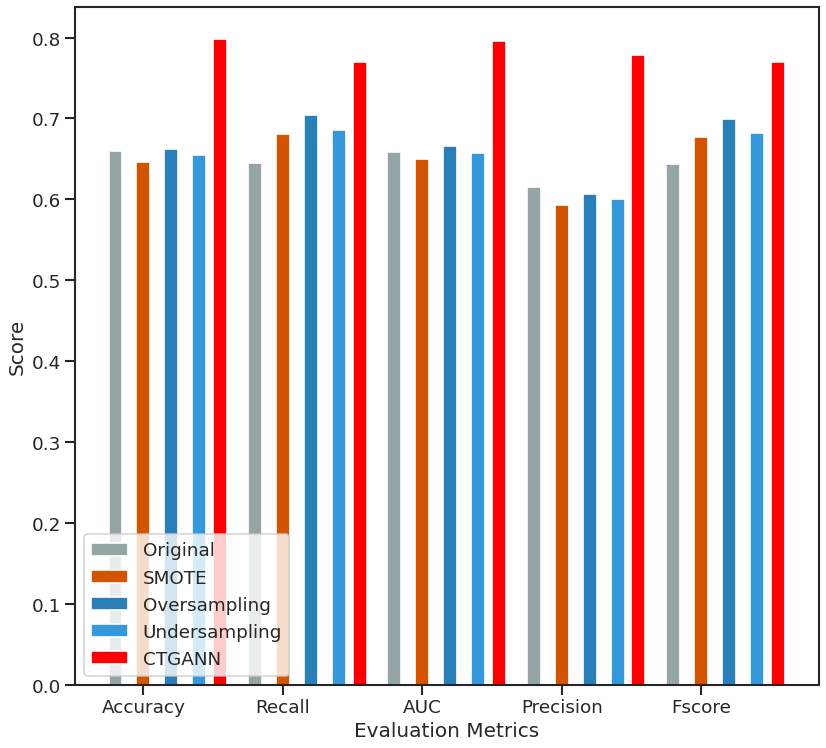

In [159]:
visualize_eval_metrics(results_rf)